### Wczytanie zbioru danych

In [90]:
import csv
import pandas as pd


def read_csv_file_data(csv_file):
    lines = []

    with open(csv_file, newline='') as file:
        reader = csv.reader(file, delimiter='\t')

        for row in reader:
            lines.append(row)

    header = ['label', 'message']
    return pd.DataFrame(data=lines, columns=header)


CSV_FILE_NAME = './../../data/SMS_Spam_Collection/SMSSpamCollection'
df_sms = read_csv_file_data(CSV_FILE_NAME)
print(df_sms.shape)

(5572, 2)


In [91]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
del CSV_FILE_NAME

### Eksploracyjna analiza danych

In [93]:
ham = df_sms[df_sms['label'] == 'ham']['message']
spam = df_sms[df_sms['label'] == 'spam']['message']
print(ham.shape)
print(spam.shape)

(4825,)
(747,)


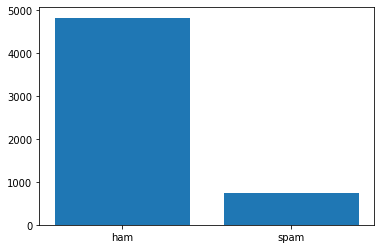

In [94]:
import matplotlib.pyplot as plt
import numpy as np


def plot_class_proportions():
    objects = ('ham', 'spam')
    y_pos = np.arange(len(objects))
    y = [ham.shape[0], spam.shape[0]]
    plt.bar(y_pos, y, align='center')
    plt.xticks(y_pos, objects)
    plt.show()


plot_class_proportions()

In [95]:
p_all = df_sms.shape[0]
p_ham = (ham.shape[0] / p_all) * 100
p_spam = (spam.shape[0] / p_all) * 100
print(p_ham, '%')
print(p_spam, '%')

86.59368269921033 %
13.406317300789663 %


- 87 % (4825) danych stanowią dane "poprawne"
- 13 % (747) danych stanowi spam

In [96]:
del p_ham
del p_spam
del p_all

In [97]:
duplicated = df_sms[df_sms.duplicated(subset=['message'], keep=False)]['message']
print(duplicated.shape)

(684,)


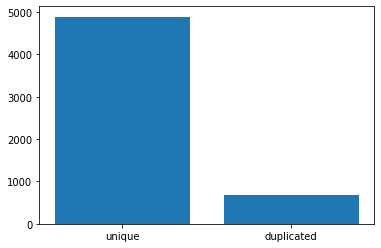

In [98]:
def plot_unique_duplication_relation():
    objects = ('unique', 'duplicated')
    y_pos = np.arange(len(objects))
    y = [df_sms.shape[0] - duplicated.shape[0], duplicated.shape[0]]
    plt.bar(y_pos, y, align='center')
    plt.xticks(y_pos, objects)
    plt.show()


plot_unique_duplication_relation()

In [99]:
def count_duplicates_by_labels(_df, _ham, _spam, dup):
    _dup_count = []

    for i in range(0, len(dup)):
        _tmp = _df[_df['message'] == dup.values[i]]
        _count = _tmp.shape[0]
        _labels_count = _tmp['label'].value_counts()
        _is_in_all_classes = False

        if _labels_count.shape != (1,):
            _is_in_all_classes = True

        _dup_count.append([_tmp['message'], _count, _is_in_all_classes])

    header = ['message', 'duplicates', 'is_crossed']
    return pd.DataFrame(data=_dup_count, columns=header)


df_l = count_duplicates_by_labels(df_sms, ham, spam, duplicated)

In [100]:
crossed = df_l[df_l['is_crossed'] == True]['is_crossed']
print(crossed.shape)

(0,)


In [101]:
max_dup_no = df_l['duplicates'].max()
print(max_dup_no)

30


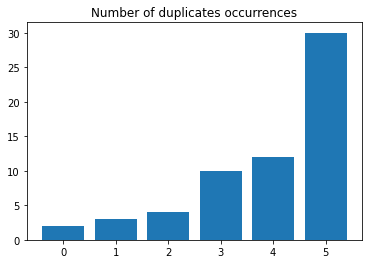

In [102]:
import numpy as np
import matplotlib.pyplot as plt


def plot_duplicates_occurrences(y):
    y_pos = np.arange(len(y))
    plt.bar(y_pos, y, align='center')
    plt.title('Number of duplicates occurrences')
    plt.show()


dup_no = list(set(df_l['duplicates']))
plot_duplicates_occurrences(dup_no)

In [103]:
most_frequent = df_l[(df_l['duplicates'] == max_dup_no)]['message']
print(most_frequent.values[0][0:1])

80    Sorry, I'll call later
Name: message, dtype: object


- 684 wiadomości się powtarzają (nie są unikatowe)
- żadna ze zduplikowanych wiadomości nie występuje w obu klasach
- największa ilość powtórzeń wiadomości zduplikowanej to 30
- najczęściej powtarzającą się wiadomością zduplikowaną jest "Sorry, I'll call later"

In [104]:
del duplicated
del df_l
del crossed
del dup_no
del max_dup_no
del most_frequent

In [105]:
def compute_messages_lengths(df):
    _lengths = []

    for index, row in df.iterrows():
        _lengths.append(len(row['message']))

    return _lengths


msg_lengths = list(set(compute_messages_lengths(df_sms)))
print(min(msg_lengths))
print(max(msg_lengths))

2
910


In [106]:
def print_msg_filtered_by_length(df, length):
    for index, row in df.iterrows():
        if len(row['message']) == length:
            print(row['message'])


print_msg_filtered_by_length(df_sms, 10)

Can a not?
Ok no prob
Anytime...
East coast


- długości wiadomości się różnią
- minimalna długość wiadomości to 2 znaki
- maksymalna długość tekstu to 910 znaków

In [107]:
del msg_lengths

In [108]:
def count_words(df, gc):
    _counter = {}

    for index, value in df.items():
        _msg = str(value).split(' ')[1:-1]

        for word in _msg:
            if word in _counter:
                _counter[word] += 1
                gc[word] += 1
            else:
                _counter[word] = 1
                gc[word] = 1

    return gc, _counter


gc = {}
gc, hc = count_words(ham, gc)
gc, sc = count_words(spam, gc)
print(len(gc))
print(len(hc))
print(len(sc))

13044
10288
3849


In [109]:
def get_most_frequent(counter_dict, entries_no=16):
    sorted_dict = {k:v for k,v in sorted(counter_dict.items(), key=lambda item: item[1], reverse=True)}
    _freq = {}
    _no = 0

    for key, value in sorted_dict.items():
        _freq[key] = value
        _no += 1

        if _no == entries_no:
            break

    return _freq


def print_most_frequent(freq_dict):
    for key, value in freq_dict.items():
        print("{k:15}, {v}".format(k=key, v=value))

g_freq = get_most_frequent(gc)
h_freq = get_most_frequent(hc)
s_freq = get_most_frequent(sc)
print('*** GLOBAL ***')
print_most_frequent(g_freq)
print()
print('*** HAM ***')
print_most_frequent(h_freq)
print()
print('*** SPAM ***')
print_most_frequent(s_freq)

*** GLOBAL ***
to             , 607
               , 438
a              , 360
&lt;#&gt;      , 257
your           , 186
or             , 185
call           , 180
the            , 177
for            , 169
2              , 168
you            , 160
is             , 143
on             , 135
Call           , 130
have           , 128
he             , 127

*** HAM ***
to             , 1535
you            , 1438
I              , 1049
the            , 1029
a              , 977
and            , 739
in             , 731
i              , 731
u              , 644
is             , 638
my             , 620
me             , 522
of             , 499
for            , 480
               , 438
that           , 386

*** SPAM ***
to             , 607
a              , 360
your           , 186
or             , 185
call           , 180
the            , 177
for            , 169
2              , 168
you            , 160
is             , 143
on             , 135
Call           , 130
have           , 128
and      

In [110]:
common_part = list(set(h_freq).intersection(s_freq))
complement = list(set(h_freq).difference(s_freq))
print(common_part)
print(complement)

['is', 'to', 'a', 'and', 'the', 'you', 'for']
['', 'I', 'of', 'me', 'u', 'my', 'that', 'in', 'i']


- najczęstsze słowa występujące w wiadomościach to: 'to', 'you', 'I', 'the', 'a', 'and', 'in', 'i', 'u', 'is', 'my', 'me', 'of', 'for', 'that', 'your'
- pomiędzy klasami występują różnice odnośnie częstotliwości występowania słów

In [111]:
del gc
del sc
del hc
del common_part
del complement
del g_freq
del h_freq
del s_freq
del ham
del spam

### Wstępne przetwarzanie tekstu

In [112]:
def eliminate_punctuation_marks(msg_str):
    _puns = ['?', "'", '-', '(', ')', '[', ']', '^', '"', ',', ':', ';', '!']
    _msg = str(msg_str)

    for i in range(0, len(_puns)):
        _msg = _msg.replace(_puns[i], '')

    return _msg


def pre_process_msg_and_get(msg):
    _msg = eliminate_punctuation_marks(msg)
    _msg = _msg.lower()
    _msg = _msg.split(' ')[1:-1]
    return _msg


def rebuild_to_raw_data_and_pre_process(df):
    _labels = []
    _messages = []

    for index, row in df.iterrows():
        _labels.append(row['label'])
        _messages.append(pre_process_msg_and_get(row['message']))

    return _messages, _labels


messages, labels = rebuild_to_raw_data_and_pre_process(df_sms)
print(len(messages))
print(len(labels))

5572
5572


In [ ]:
import nltk
nltk.download('corpora')
nltk.download('punkt')

In [113]:
import nltk.stem.wordnet as nsw
import nltk.stem.porter as nsp


def convert_msg_to_canonical(msg, function):
    _data = []

    for i in range(0, len(msg)):
        _sub_data = []

        for j in range(0, len(msg[i])):
            _word = msg[i][j]
            _canonical = function(_word)
            _sub_data.append(_canonical)

        _data.append(_sub_data)

    return _data


def to_lemma(string):
    return wnl.lemmatize(string, 'v')


def to_stem(string):
    return ps.stem(string)


wnl = nsw.WordNetLemmatizer()
ps = nsp.PorterStemmer()
msg_lem = convert_msg_to_canonical(messages, to_lemma)
msg_stem = convert_msg_to_canonical(messages, to_stem)

In [114]:
import random as rnd


def group_indices_by_labels(_labels):
    _ham = [i if _labels[i] == 'ham' else None for i in range(0, len(_labels))]
    _spam = [i if _labels[i] == 'spam' else None for i in range(0, len(_labels))]
    _ham = [x for x in _ham if x is not None]
    _spam = [x for x in _spam if x is not None]
    return _ham, _spam


def get_random_indices(indices):
    msg_no = 8
    randoms = indices[:]
    rnd.shuffle(randoms)
    return randoms[0:msg_no]


ham_indices, spam_indices = group_indices_by_labels(labels)
random_hams = get_random_indices(ham_indices)
random_spams = get_random_indices(spam_indices)
print(random_hams)
print(random_spams)

[5503, 3098, 3068, 3657, 597, 3477, 4109, 2810]
[4906, 2915, 1444, 5228, 1097, 1793, 866, 1407]


In [115]:
def print_lemmas_and_stems(lemmas, stems, random_idx):
    for i in range(0, len(random_idx)):
        ham_index = random_idx[i]
        _lemma = lemmas[ham_index]
        _stem = stems[ham_index]
        print('l', _lemma)
        print('s', _stem)


def print_comparison_lemmas_with_stems(lemmas, stems, hams, spams):
    print('*** HAM ***')
    print_lemmas_and_stems(lemmas, stems, hams)
    print()
    print('*** SPAM ***')
    print_lemmas_and_stems(lemmas, stems, spams)


print_comparison_lemmas_with_stems(msg_lem, msg_stem, random_hams, random_spams)

*** HAM ***
l ['*', 'be', 'much', 'easy', 'give', 'your', 'account', 'identification', 'so', 'i', 'will', 'tomorrow', 'at']
s ['*', 'is', 'much', 'easi', 'give', 'your', 'account', 'identif', 'so', 'i', 'will', 'tomorrow', 'at']
l ['you', 'at', 'jp', 'and', 'hungry', 'like', 'a']
s ['you', 'at', 'jp', 'and', 'hungri', 'like', 'a']
l ['so', 'april.', 'cant']
s ['so', 'april.', 'cant']
l ['really', 'do', 'you', 'make', 'it', 'on', 'air', 'whats', 'your']
s ['realli', 'did', 'you', 'make', 'it', 'on', 'air', 'what', 'your']
l ['mrng', 'dear', 'have', 'a', 'nice']
s ['mrng', 'dear', 'have', 'a', 'nice']
l ['can', 'probably', 'come', 'by', 'everybodys', 'do', 'around', '', '&lt#&gt', '']
s ['can', 'probabl', 'come', 'by', 'everybodi', 'done', 'around', '', '&lt#&gt', '']
l ['send', 'me', 'your', 'address']
s ['send', 'me', 'your', 'address']
l ['yeah', 'i', 'forgot.', 'u', 'can', 'only', 'take', '2', 'out', 'shop', 'at']
s ['yeah', 'i', 'forgot.', 'u', 'can', 'onli', 'take', '2', 'out', 'sh

In [116]:
del wnl
del ps
del random_hams
del random_spams
del messages
del msg_stem

In [117]:
import nltk.corpus as nc

stop_words = tuple(set(nc.stopwords.words('english')))
print(stop_words[0:8])
print(stop_words[-8:-1])

('shouldn', 'd', 'ma', 'an', 'out', 'mustn', 'you', 'had')
("it's", 't', "she's", "that'll", 'y', 'all', "needn't")


Wydaje się, że lista słów przestankowych jest wystarczająca, jako że zawiera takie słowa jak "ain't" (kolokwializm) czy "up" (prawdopodobnie ze względu na niedbałe "yup"). Ponadto slang przekształca się szybciej niżeli mowa wzorcowa, a i trudno odnaleźć jakiś slangowy zbiór słów.

In [118]:
def filter_by_stop_words(lemmas, stoppers):
    _filtered = []

    for sentence in lemmas:
        _entry = []

        for word in sentence:
            if word not in stoppers:
                _entry.append(word)

        _filtered.append(_entry)

    return _filtered


filtered_lemmas = filter_by_stop_words(msg_lem, stop_words)

In [119]:
prev_most_frequent_words = ['to', 'you', 'I', 'the', 'a', 'and', 'in', 'i', 'u', 'is', 'my', 'me', 'of', 'for', 'that', 'your']
freq_words_in_stop_words = [x for x in stop_words if x in prev_most_frequent_words]
complement = set(prev_most_frequent_words).difference(freq_words_in_stop_words)
print(len(prev_most_frequent_words))
print(len(freq_words_in_stop_words))
print(complement)

16
14
{'I', 'u'}


In [120]:
del stop_words
del msg_lem
del prev_most_frequent_words
del freq_words_in_stop_words
del complement

In [121]:
import sklearn.feature_extraction.text as skf


def lemmas_to_one_hot(lemmas, labels):
    # token for accepting one-letter words
    v = skf.CountVectorizer(lowercase=False, token_pattern=r"(?u)\b\w+\b")
    one_hot = []
    semantically_empty_sentences = 0
    _labels = []

    for i in range(0, len(lemmas)):
        is_ok = True

        try:
            result = v.fit_transform(lemmas[i]).toarray()
            one_hot.append(result)
        except ValueError:
            semantically_empty_sentences += 1
            is_ok = False

        if is_ok:
            _labels.append(0 if labels[i] == 'ham' else 1)

    return one_hot, _labels, semantically_empty_sentences


X_embeddings, y_embeddings, rejected = lemmas_to_one_hot(filtered_lemmas, labels)
print(len(X_embeddings))
print(len(y_embeddings))
print(rejected)

5432
5432
140


In [122]:
del rejected
del filtered_lemmas
del labels
del ham_indices
del spam_indices
del df_sms
del nc

### Naiwna klasyfikacja Bayesa

In [123]:
def expand_labels(x_set, _labels):
    expanded = []

    for i in range(0, len(_labels)):
        x_dim = x_set[i].shape[0]
        _new = [_labels[i] for _ in range(0, x_dim)]
        expanded.append(_new)

    return expanded


y_exp = expand_labels(X_embeddings, y_embeddings)

In [124]:
import sklearn.naive_bayes as skb

case = 11
bayes = skb.MultinomialNB()
bayes.fit(X_embeddings[case], y_exp[case])
print(bayes.coef_)

[[-2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
  -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
  -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
  -2.99573227 -2.99573227]
 [-2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
  -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
  -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
  -2.99573227 -2.99573227]]


In [125]:
del bayes
del case
del y_embeddings
del y_exp
del X_embeddings

In [ ]:
!jupyter nbconvert --to pdf lab6.ipynb

In [ ]:
del _exit_code